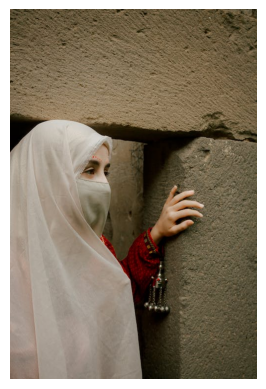

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/image.jpeg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

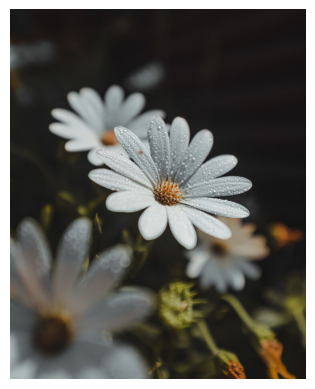

In [6]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/image.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [10]:
# Load the pre-trained face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

In [11]:
import cv2
import numpy as np

# Load images
image1 = cv2.imread('images/image.jpeg')
image2 = cv2.imread('images/image.jpg')

# Detect keypoints and descriptors
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Match keypoints
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Extract matched keypoints
points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

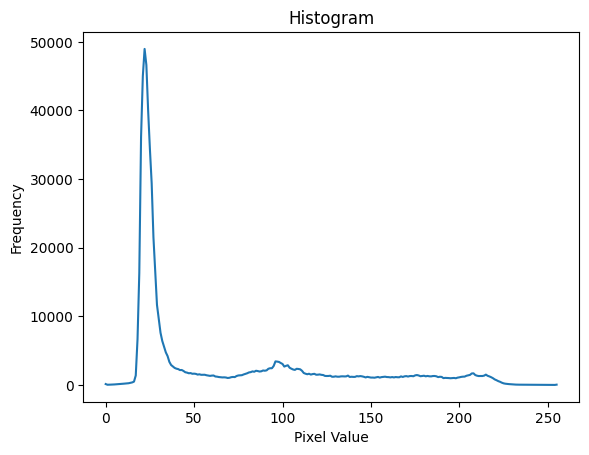

In [12]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Calculate optical flow
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
new_gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, new_gray, p0, None, **lk_params)

# Select good points
good_new = p1[st == 1]
good_old = p0[st == 1]

# Draw tracks
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
    new_frame = cv2.circle(new_frame, (a, b), 5, color[i].tolist(), -1)
img = cv2.add(new_frame, mask)

NameError: name 'old_frame' is not defined

In [14]:
import cv2

# Load YOLO
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes = []
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')

# Load image and prepare input blob
image = cv2.imread('object_detection_image.jpg')
height, width = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

# Set input blob for the network
net.setInput(blob)

# Run forward pass to get output layer names
output_layer_names = net.getUnconnectedOutLayersNames()
outs = net.forward(output_layer_names)

# Post-process the detection
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            label = f"{classes[class_id]}: {confidence:.2f}"
            cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'cv::dnn::dnn4_v20230620::readNetFromDarknet'


In [15]:
import numpy as np

# Define a sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Apply the convolution operation
sharpened_image = cv2.filter2D(image, -1, kernel)

In [16]:
sharpened_image

array([[[ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30],
        ...,
        [ 23,  24,  28],
        [ 23,  24,  28],
        [ 23,  24,  28]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26],
        ...,
        [ 19,  20,  24],
        [ 19,  20,  24],
        [ 19,  20,  24]],

       [[ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27],
        ...,
        [ 20,  21,  25],
        [ 20,  21,  25],
        [ 20,  21,  25]],

       ...,

       [[180, 178, 167],
        [180, 178, 167],
        [180, 178, 167],
        ...,
        [ 18,  21,  26],
        [ 18,  21,  26],
        [ 18,  21,  26]],

       [[180, 178, 167],
        [180, 178, 167],
        [180, 178, 167],
        ...,
        [ 18,  21,  26],
        [ 18,  21,  26],
        [ 18,  21,  26]],

       [[180, 178, 167],
        [180, 178, 167],
        [180, 178, 167],
        ...,
        [ 18,  21,  26],
        [ 18,  21,  26],
        [ 18,  21,  26]]